In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.tree import DecisionTreeRegressor as Tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate

In [2]:
def create_submission(test_x, test_y, filename):
    sub_folder = "../submissions/"
    submission = pd.DataFrame(test_y, columns=['SalePrice'])
    submission['Id'] = test_X['Id'].astype(int).copy()
    submission.to_csv(sub_folder + filename, index=False)

In [3]:
train = pd.read_csv("../data/train.csv")
test_X = pd.read_csv('../data/test.csv')

In [4]:
train_Y = train['SalePrice'].copy()
train_X = train.drop(['SalePrice'],axis=1).copy()

train_X = train.copy()

In [5]:
#train_X.columns

In [6]:
#plot_thingy = train[['SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt']].copy()
#scatter_matrix(plot_thingy, alpha=0.2, figsize=(20, 20), diagonal='kde')

In [7]:
class Cleanup(TransformerMixin):
    def _init_(self):
        pass
    def fit(self, X, y=None):
        return self    
    def transform(self, X, y=None):
        Q = X.copy()
        Q = Q.select_dtypes(include=[np.number]).copy()
        Q = Q.drop(['Id'], axis=1)
        return Q

In [8]:
class ColSaver(TransformerMixin):
    def _init_(self):
        self.columns
    def fit(self, X, y=None):
        self.columns = X.columns
        return self
    def transform(self, X, y=None):
#        print(X.columns)
        return X

In [9]:
my_pipeline = Pipeline(steps = [
    ('Cleanup', Cleanup()),
#    ('CatergoricalEncoding', ce.OneHotEncoder()),
    ('ColSaver',ColSaver()),
    ('imputer', Imputer(strategy='mean')),
    ('std_scalar', StandardScaler())
#    ('Poly',PolynomialFeatures(degree=4))
])

In [10]:
train_X_processed = my_pipeline.fit_transform(train_X)

In [ ]:
model_inertia = pd.DataFrame(columns=['SSE from centroids'])
for k in range(1,300, 10):
    model = KMeans(n_clusters =k).fit(train_X_processed)
    model_inertia.loc[k] = model.inertia_

plt.figure(figsize=(10, 10))
plt.plot(model_inertia, '.')
plt.grid()
plt.xlabel('K')
plt.ylabel('SSE from centriods')

In [ ]:
model_inertia = pd.DataFrame(columns=['SSE from centroids'])
for k in range(1,50, 3):
    model = KMeans(n_clusters =k).fit(train_X_processed)
    model_inertia.loc[k] = model.inertia_

plt.figure(figsize=(10, 10))
plt.plot(model_inertia, '.')
plt.grid()
plt.xlabel('K')
plt.ylabel('SSE from centriods')

In [11]:
#model = KMeans(n_clusters = 20).fit(train_X_processed)
#clusters = pd.DataFrame(model.cluster_centers_).transpose()
#clusters.set_index(my_pipeline.named_steps['ColSaver'].columns )

In [ ]:
print("K must be less than # of samples, so for CV that is {}".format(len(train_X_processed)*(4/5)))

In [ ]:
scores = []

for k in range(1,1200, 100):
    print(k)
    model = KMeans(n_clusters=k)
    q = cross_validate(model, 
                       train_X_processed,
                       np.log1p(train_Y), 
                       #train_Y, 
                       cv=5, 
                       scoring = 'neg_mean_squared_error', 
                       n_jobs=-1, 
                       return_train_score=True)    
    scores.append([k, np.sqrt(-np.mean(q['train_score'])), np.sqrt(-np.mean(q['test_score']))])

scores = pd.DataFrame(scores, columns=['K', 'Train_Score', 'Test_Score'])

In [ ]:
#scores

In [ ]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.xlabel('K')
plt.ylabel('Score')
plt.plot(scores['K'], scores['Train_Score'], '.', label = 'Train')
plt.plot(scores['K'], scores['Test_Score'], '.', label = 'Test')
plt.legend()

In [110]:
model = KMeans(n_clusters = 10)

In [111]:
x= model.fit_predict(train_X_processed, train_Y)

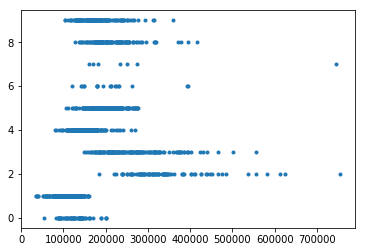

In [112]:
plt.plot(train_Y.values,x, '.')

In [ ]:
q = np.expm1(x)

In [40]:
x = np.expm1(model.fit_predict(train_X_processed, train_Y))

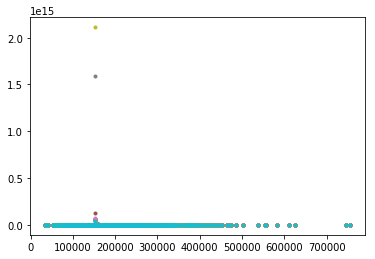

In [42]:
train_Y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [43]:
x

array([6.3890561 , 1.71828183, 6.3890561 , ..., 6.3890561 , 1.71828183,
       1.71828183])